In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 


In [14]:
df=pd.read_csv("./Data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [21]:
df.groupby("ocean_proximity").value_counts()

ocean_proximity  longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value
<1H OCEAN        -124.14    40.57     29.0                2864.0       600.0           1314.0      562.0       2.1354         75100.0               1
                            40.58     25.0                1899.0       357.0           891.0       355.0       2.6987         92500.0               1
                 -124.11    40.57     33.0                1348.0       234.0           573.0       236.0       2.4896         74100.0               1
                 -124.10    40.47     52.0                1196.0       236.0           965.0       265.0       3.5345         55000.0               1
                            40.50     30.0                1927.0       393.0           996.0       374.0       2.2357         72300.0               1
                                                                                                         

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
df.dropna(inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

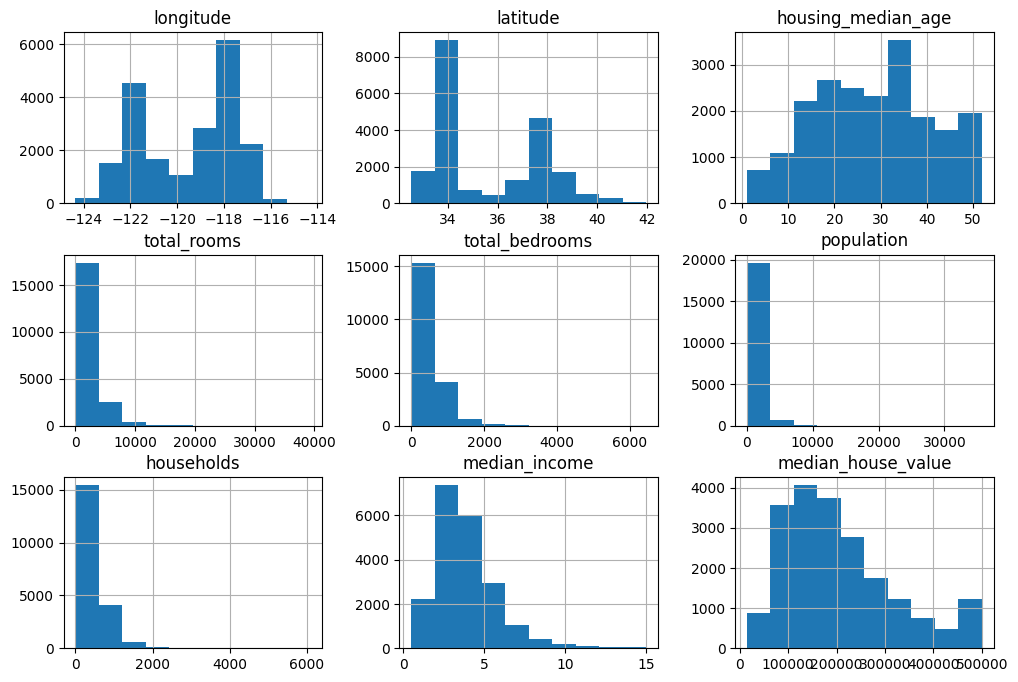

In [25]:
df.hist(figsize=(12,8))

In [26]:
from sklearn.model_selection import train_test_split
X=df.drop("median_house_value",axis=1)

In [27]:
y=df["median_house_value"]

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
train_data=X_train.join(y_train)

In [33]:
train_data.corr()

ValueError: could not convert string to float: 'INLAND'

In [34]:
sns.heatmap(train_data.corr,annot=True)

ValueError: Must pass 2-d input. shape=()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

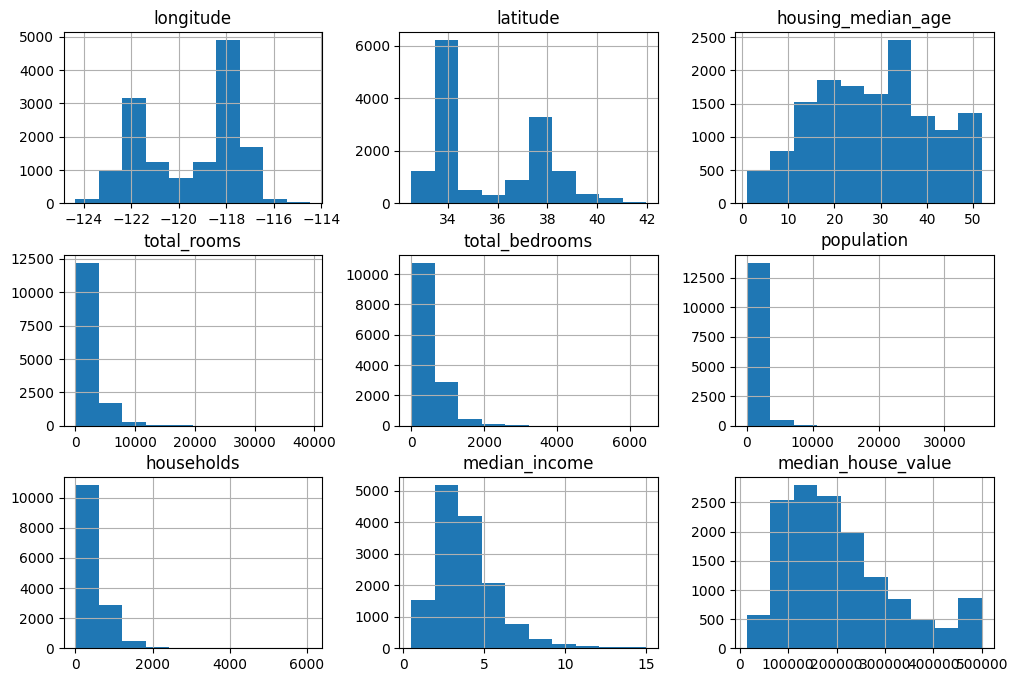

In [35]:
train_data.hist(figsize=(12,8))

In [39]:
train_data["households"]=np.log(train_data["households"]+1)
train_data["total_bedrooms"]=np.log(train_data["total_bedrooms"]+1)
train_data["population"]=np.log(train_data["population"]+1)
train_data["total_rooms"]=np.log(train_data["total_rooms"]+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

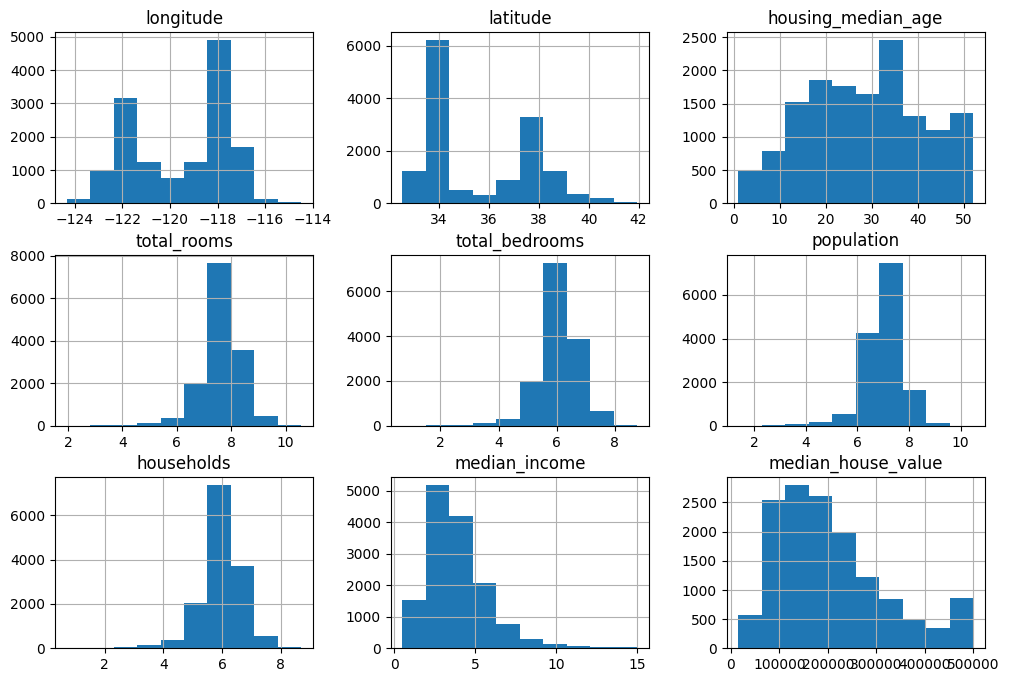

In [40]:
train_data.hist(figsize=(12,8))

In [41]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [46]:
pd.get_dummies(train_data.ocean_proximity).astype(int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19566,0,1,0,0,0
7292,1,0,0,0,0
17618,1,0,0,0,0
17518,1,0,0,0,0
5172,1,0,0,0,0
...,...,...,...,...,...
11397,1,0,0,0,0
12081,1,0,0,0,0
5447,1,0,0,0,0
866,0,0,0,1,0


In [49]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop("ocean_proximity",axis=1)

In [50]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19566,-120.96,37.61,23.0,8.159947,6.788972,7.811163,6.705639,1.9444,93400.0,0,1,0,0,0
7292,-118.22,33.98,34.0,7.707962,6.625392,8.000014,6.602588,1.6685,128800.0,1,0,0,0,0
17618,-121.94,37.28,27.0,7.958577,6.142037,7.043160,6.066108,5.0822,327500.0,1,0,0,0,0
17518,-121.91,37.34,35.0,7.691657,6.410175,7.085064,6.333280,2.8042,240900.0,1,0,0,0,0
5172,-118.28,33.95,41.0,6.728629,5.342334,6.562444,5.262690,1.4103,86200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0


<Axes: >

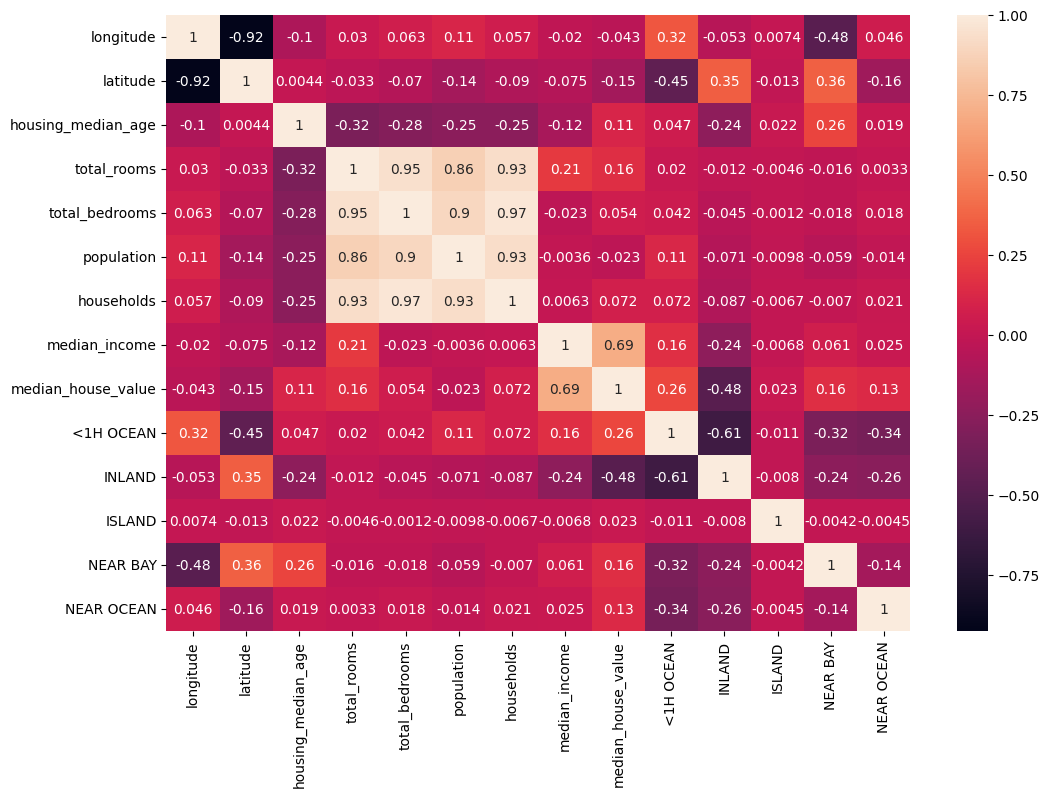

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True)

<Axes: xlabel='longitude', ylabel='latitude'>

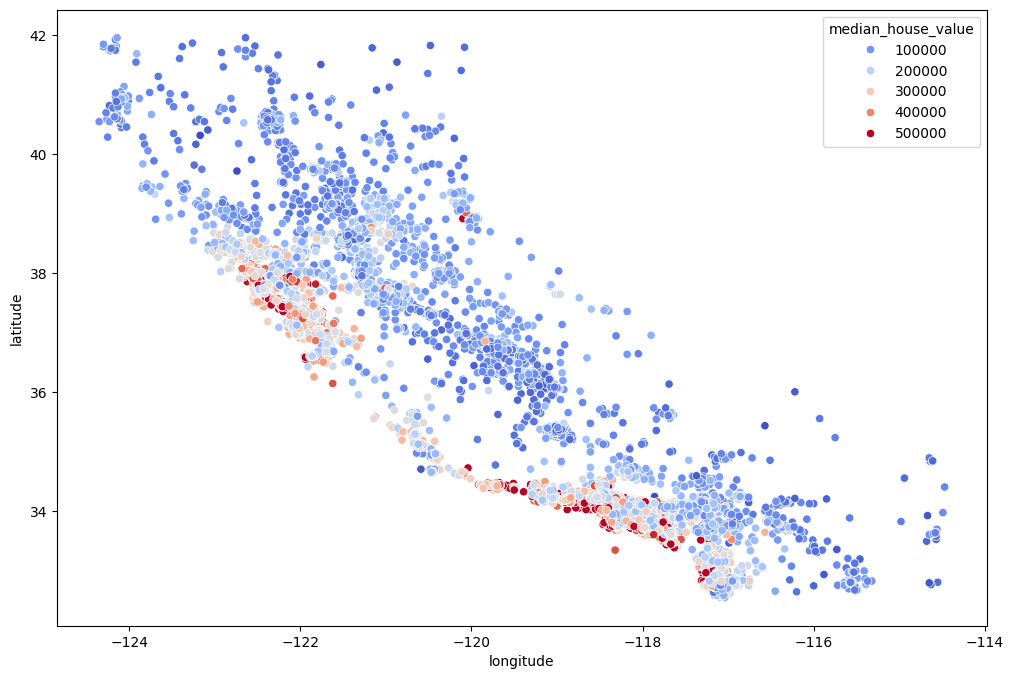

In [55]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="longitude",y="latitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [56]:
train_data["bedroom_ration"]=train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["house_hold_rooms"]=train_data["total_rooms"]/train_data["households"]

<Axes: >

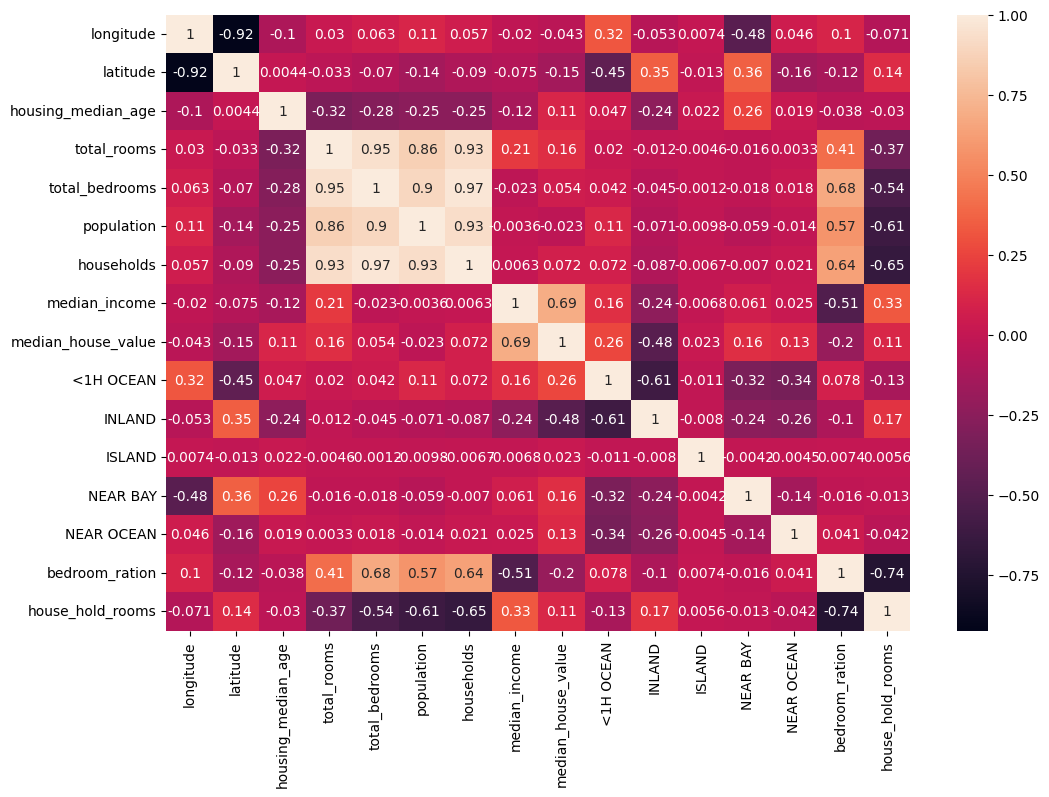

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True)

In [60]:
from sklearn.linear_model import LinearRegression

X_train,y_train=train_data.drop("median_house_value",axis=1),train_data["median_house_value"]

lrreg=LinearRegression()
lrreg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
test_data=X_test.join(y_test)

test_data["households"]=np.log(test_data["households"]+1)
test_data["total_bedrooms"]=np.log(test_data["total_bedrooms"]+1)
test_data["population"]=np.log(test_data["population"]+1)
test_data["total_rooms"]=np.log(test_data["total_rooms"]+1)

pd.get_dummies(test_data.ocean_proximity).astype(int)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop("ocean_proximity",axis=1)
test_data["bedroom_ration"]=test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["house_hold_rooms"]=test_data["total_rooms"]/test_data["households"]

X_test,y_test=test_data.drop("median_house_value",axis=1),test_data["median_house_value"]




In [62]:
print(train_data.info())
print(test_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 14303 entries, 19566 to 15948
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14303 non-null  float64
 1   latitude            14303 non-null  float64
 2   housing_median_age  14303 non-null  float64
 3   total_rooms         14303 non-null  float64
 4   total_bedrooms      14303 non-null  float64
 5   population          14303 non-null  float64
 6   households          14303 non-null  float64
 7   median_income       14303 non-null  float64
 8   median_house_value  14303 non-null  float64
 9   <1H OCEAN           14303 non-null  int64  
 10  INLAND              14303 non-null  int64  
 11  ISLAND              14303 non-null  int64  
 12  NEAR BAY            14303 non-null  int64  
 13  NEAR OCEAN          14303 non-null  int64  
 14  bedroom_ration      14303 non-null  float64
 15  house_hold_rooms    14303 non-null  float64
dtypes: fl

In [63]:
lrreg.score(X_test,y_test)

0.6754214998898805

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_test_s=scaler.fit_transform(X_test)
lrreg.score(X_test_s,y_test)

d:\Internship\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-362.5002344813882

In [66]:
from sklearn.ensemble import RandomForestRegressor
RandomForestModel=RandomForestRegressor()
RandomForestModel.fit(X_train,y_train)
RandomForestModel.score(X_test,y_test)

0.8160292425604966

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "n_estimators":[100,200,300],
    "min_samples_split":[4,6,8],
    "max_depth":[4,6,8,10]
    
}
grid_search=GridSearchCV(RandomForestModel,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X_train,y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [4, 6, ...], 'min_samples_split': [4, 6, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,300


In [74]:
best_forest=grid_search.best_estimator_


In [75]:
best_forest.score(X_test,y_test)

0.7832123465111734